
# The Iris Dataset
This data sets consists of 3 different types of irises'
(Setosa, Versicolour, and Virginica) petal and sepal
length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being:
Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features.
See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more
information on this dataset.


In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

## Loading the iris dataset



In [8]:
from sklearn import datasets

# Load iris dataset.
iris = datasets.load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Scatter Plot of the Iris dataset



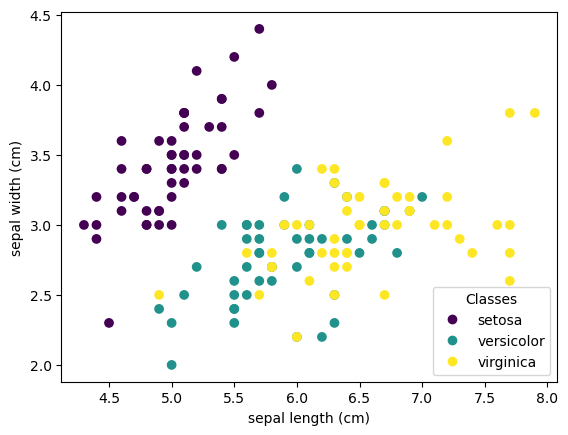

In [2]:
import matplotlib.pyplot as plt

# Creates a figure and a set of subplots. Result is a tuple comtaining a figure object and an axis object (ax)
# This is actually the simplest and recommended way of creating a single Figure and Axes.
_, ax = plt.subplots()
# Creates a scatter plot on the axes. First (sepal length) and second (sepal width) columns of iris dataset are used as x and y coordinates. The colors of the points are determined by the target values (iris.target).
# iris.target is an array containing the target values (species labels) for each sample in the Iris dataset.
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)

# Sets axes to feature names from the iris dataset.
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
# Creates legend based on colors used in plot and target names from iris dataset.
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Each point in the scatter plot refers to one of the 150 iris flowers
in the dataset, with the color indicating their respective type
(Setosa, Versicolour, and Virginica).
You can already see a pattern regarding the Setosa type, which is
easily identifiable based on its short and wide sepal. Only
considering these 2 dimensions, sepal width and length, there's still
overlap between the Versicolor and Virginica types.



## Plot a PCA representation
Let's apply a Principal Component Analysis (PCA) to the iris dataset
and then plot the irises across the first three PCA dimensions.
This will allow us to better differentiate between the three types!

If you have a specific figure and want to add subplots to it one by one, you can use plt.figure.add_subplot().
If you want to create a new figure with a grid of subplots in one go, plt.subplots() is a convenient option.


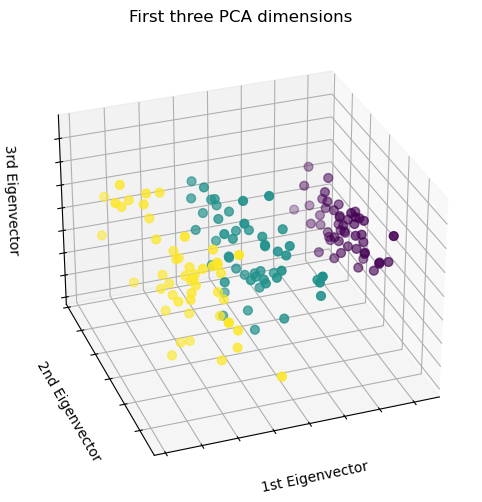

In [11]:
# unused but required import for doing 3d projections with matplotlib < 3.2
# The # noqa: F401 comment is used to ignore the "unused import" warning
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

# Creates a new figure with the specified figure number (1) and size (8x6 inches).
fig = plt.figure(1, figsize=(8, 6))
# This line adds a 3D subplot to the figure (ax). The 111 argument indicates a single subplot in a grid (1x1 grid). The projection="3d" parameter specifies that it's a 3D subplot. The elev and azim parameters set the elevation and azimuthal angles of the plot, determining the viewing perspective.
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Apply PCA and reduce data to 3 components. The resulting transformed data is stored in X_reduced.
#.fit_transform learns the parameters but also applies the transformation to the data in a single step.
X_reduced = PCA(n_components=3).fit_transform(iris.data)
#Plot reduced data, pulls out columns of transformed data as axes. Color is iris target and size is 40.
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

PCA will create 3 new features that are a linear combination of the
4 original features. In addition, this transform maximizes the variance.
With this transformation, we see that we can identify each species using
only the first feature (i.e. first eigenvalues).

